## What are the variables that have the greatest influence on math grades?
## Is it possible to predict student grades based on these variables?

In [2]:
import pandas as pd
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

# Data Cleaning

In [4]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop Columns

In [5]:
df = df.drop("Unnamed: 0", axis=1)

## Drop NaNs

In [6]:
cols_to_drop = ["EthnicGroup","ParentEduc","TestPrep","ParentMaritalStatus","PracticeSport", "IsFirstChild","NrSiblings","TransportMeans","WklyStudyHours"]
df = df.dropna(subset=cols_to_drop, axis=0)

In [7]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [8]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


# Type of data

Data - Categorical - Ordinal = "ParentEduc", "TestPrep", "PracticeSport"
Data - Categorical - Nominal = "Gender", "EthnicGroup", "LunchType", "ParentMaritalStat", "PracticeSport", "IsFirstChild", "TransportMeans"] 
Data - Numerical - Discrete = "WklyStudyHours", "NrSiblings"
Data - Numerical - Continuous = "MathScore","ReadingScore","WritingScore "

## Transformation of Categorical data 

### Ordinal data - Label incoding
<p>"ParentEduc"</p> 
<p>"TestPrep"</p>
<p>"PracticeSport"</p>

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### ParentEduc

In [10]:
df["ParentEduc"].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [11]:
le.fit(["some high school","high school" ,"some college", "associate's degree", "bachelor's degree", "master's degree"])
df["ParentEduc"] = le.transform(df["ParentEduc"])

#### TestPrep

In [12]:
df["TestPrep"].unique()

array(['none', 'completed'], dtype=object)

In [13]:
le.fit(['none', 'completed'])
df["TestPrep"] = le.transform(df["TestPrep"])

#### PracticeSport

In [14]:
df["PracticeSport"].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [15]:
le.fit(["never", "sometimes", "regularly"])
df["PracticeSport"] = le.transform(df["PracticeSport"])

#### WklyStudyHours

In [16]:
df["WklyStudyHours"].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [17]:
le.fit(['< 5', '5 - 10', '> 10'])
df["WklyStudyHours"] = le.transform(df["WklyStudyHours"])

### Nominal - Getdummies

<p>"Gender"</p>
<p>"EthnicGroup" </p>
<p>"LunchType"</p>
<p>"ParentMaritalStat"</p> 
<p>"PracticeSport"</p> 
<p>"IsFirstChild"</p>
<p>"TransportMeans"</p>

In [18]:
df = pd.get_dummies(df, columns=["Gender", "EthnicGroup", "LunchType", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ParentEduc                    19243 non-null  int32  
 1   TestPrep                      19243 non-null  int32  
 2   NrSiblings                    19243 non-null  float64
 3   WklyStudyHours                19243 non-null  int32  
 4   MathScore                     19243 non-null  int64  
 5   ReadingScore                  19243 non-null  int64  
 6   WritingScore                  19243 non-null  int64  
 7   Gender_female                 19243 non-null  uint8  
 8   Gender_male                   19243 non-null  uint8  
 9   EthnicGroup_group A           19243 non-null  uint8  
 10  EthnicGroup_group B           19243 non-null  uint8  
 11  EthnicGroup_group C           19243 non-null  uint8  
 12  EthnicGroup_group D           19243 non-null  uint8  
 13  E

In [20]:
df.columns

Index(['ParentEduc', 'TestPrep', 'NrSiblings', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'Gender_female', 'Gender_male',
       'EthnicGroup_group A', 'EthnicGroup_group B', 'EthnicGroup_group C',
       'EthnicGroup_group D', 'EthnicGroup_group E', 'LunchType_free/reduced',
       'LunchType_standard', 'ParentMaritalStatus_divorced',
       'ParentMaritalStatus_married', 'ParentMaritalStatus_single',
       'ParentMaritalStatus_widowed', 'PracticeSport_0', 'PracticeSport_1',
       'PracticeSport_2', 'IsFirstChild_no', 'IsFirstChild_yes',
       'TransportMeans_private', 'TransportMeans_school_bus'],
      dtype='object')

# Linear Regression

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column

RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

dfX = df.drop('MathScore',axis=1)

X=dfX
y=df['MathScore']

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)


,ParentEduc,TestPrep,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,...,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_0,PracticeSport_1,PracticeSport_2,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus
2,3,1,4.0,1,93,91,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
4,4,1,0.0,0,78,75,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
5,0,1,1.0,0,84,79,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
6,4,0,1.0,0,93,89,1,0,0,1,...,0,0,1,1,0,0,1,0,1,0
7,4,1,1.0,2,43,39,0,1,0,1,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,4,1,2.0,0,53,49,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
30636,2,1,2.0,0,61,65,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
30637,2,1,1.0,0,53,51,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
30639,0,0,3.0,0,90,93,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1


## Model Development

In [26]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [ ]:
y_pred = regr.predict(X_test)
print(mean_squared_error(y_test,y_pred))

### Data scatter of predicted values

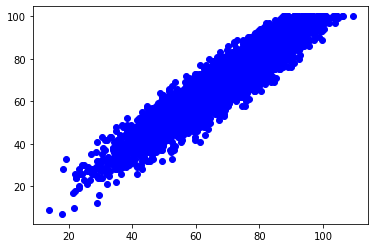

In [43]:
y_pred = regr.predict(X_test)
plt.scatter(y_pred, y_test, color = 'b')

plt.show()

### OLS

In [42]:
import statsmodels.api as sm
X_train_const_ct = sm.add_constant(X_train.to_numpy()) 

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test) 
predictions_test = model.predict(X_test_const_ct)

# hacer que en el OLS salgan los nombres de las columnas en lugar de las x1,x2,x3
# para eso es necesario agregar la columna "const" a la lista con nombre de las columnas.
features = list(['const']) + list(X.columns)
print_model = model.summary(xname=features)

print(print_model)

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     4933.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        19:40:30   Log-Likelihood:                -41865.
No. Observations:               13470   AIC:                         8.377e+04
Df Residuals:                   13450   BIC:                         8.392e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Feature Importances

In [51]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': regr.coef_.reshape(len(X_train.columns),)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
7,Gender_male,6.377474
12,EthnicGroup_group E,4.197838
1,TestPrep,3.497435
14,LunchType_standard,1.910227
5,WritingScore,0.663712
20,PracticeSport_1,0.514599
4,ReadingScore,0.266840
21,PracticeSport_2,0.205657
3,WklyStudyHours,0.190734
15,ParentMaritalStatus_divorced,0.108781


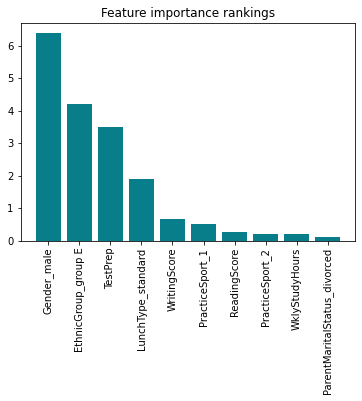

In [52]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()